In [79]:
import numpy as np
import matplotlib.pyplot as plt
import stats
import scipy.interpolate as Interpolate


In [ ]:
config = {}
file = open('3by3MonteCarlo.txt').readlines()
for line in file:
    
    l = line.split(' => ');
    config.update({l[0]:int(l[1])})
histArray = []    
for i in config.keys():
    for j in range(config[i]):
        histArray.append(int(i,2))
plt.hist(histArray , bins = np.linspace(0,511,512),normed = True)
x_axis = np.linspace(1,len(config.keys()),len(config.keys()))
plt.show()

-60.0375757576
614.32586079
0.249104631132


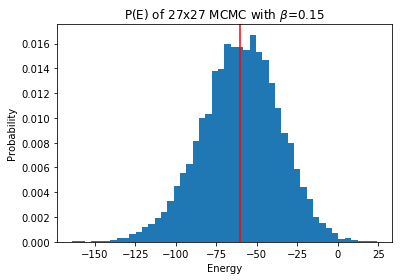

In [85]:
energy = []
file = open('27by27MonteCarlo.txt').readlines()
for line in file:
    energy.append(int(line.split()[0]))
energy = np.array(energy)
(mean, error, variance, autocorrelation) = stats.Stats(energy)
print(mean)
print(error)
print(np.std(energy)/np.sqrt(len(energy)))
plt.hist(energy,bins = 48,normed = True)
plt.axvline(mean,color='red')
plt.xlabel('Energy')
plt.ylabel('Probability')
plt.title("P(E) of 27x27 MCMC with "+ r'$\beta$'+ "=0.15")

plt.show()

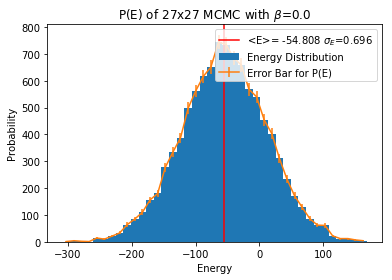

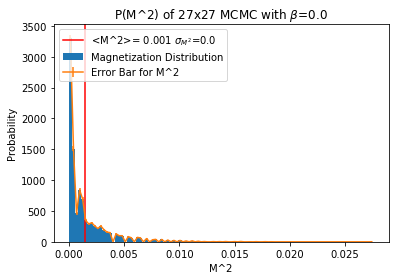

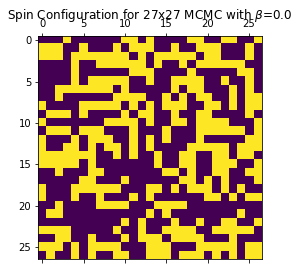

In [6]:
###Plot for 27x27 simulation 
def plotGenerate(beta):
    energy = []
    mag = []
    config = []
    file = open('27x27MCMC/beta='+str(beta)+'.txt').readlines()
    for line in file:
        component = line.split()
        if (component[0] == 'E'):
            energy.append(int(component[1]))
        elif(component[0] == 'S'):
            config.append(int(component[1]))
        else:
            mag.append(float(component[1]))
    energy = np.array(energy)
    mag = np.array(mag)
    config = np.array(config).reshape((27,27))
    (mean, variance, error, autocorrelation) = stats.Stats(energy)
    (mean_M, variance_M, error_M, autocorrelation_M) = stats.Stats(mag)
    ###Energy Plot
    plt.figure(0)
    entries, edges, _ = plt.hist(energy,bins = 40,label = 'Energy Distribution')
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    plt.errorbar(bin_centers, entries, yerr= np.sqrt(entries),label = 'Error Bar for P(E)')
    plt.axvline(mean,color='red',label = '<E>= '+str(mean.round(3))+r' $\sigma_E$'+'='+str(error.round(3)))
    plt.legend(loc = 'upper right')
    plt.xlabel('Energy')
    plt.ylabel('Probability')
    plt.title("P(E) of 27x27 MCMC with "+ r'$\beta$'+ "="+str(beta))
    ###Mag Plot
    plt.figure(1)
    entries_M, edges_M, _ = plt.hist(mag,bins =100,label = 'Magnetization Distribution')
    bin_centers_M = 0.5 * (edges_M[:-1] + edges_M[1:])
    plt.errorbar(bin_centers_M, entries_M, yerr= np.sqrt(entries_M),label = 'Error Bar for M^2')
    plt.axvline(mean_M,color='red',label = '<M^2>= '+str(mean_M.round(3))+r' $\sigma_{M^2}$'+'='+str(error_M.round(3)))
    plt.legend(loc = 'upper left')
    plt.xlabel('M^2')
    plt.ylabel('Probability')
    plt.title("P(M^2) of 27x27 MCMC with "+ r'$\beta$'+ "="+str(beta)) 
    ###Config Snapshot
    plt.figure(2)
    plt.matshow(config)
    plt.title("Spin Configuration for 27x27 MCMC with "+ r'$\beta$'+ "="+str(beta))
    return plt.show()

plotGenerate(0.0)


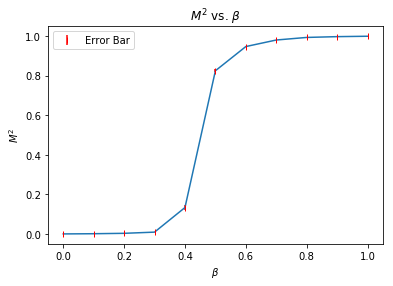

In [7]:

M_2 = np.array([0.001,0.002,0.004,0.01,0.134,0.824,0.946,0.979,0.992,0.996,0.998])
M_2_error = np.array([0.0,0.0,0.0,0.0,0.014,0.008,0.0,0.0,0.0,0.0,0.0])
b = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.plot(b,M_2)
plt.errorbar(b,M_2,yerr=M_2_error,fmt='r|',label='Error Bar')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$M^2$')
plt.title(r'$M^2$ vs. $\beta$')
plt.legend(loc='upper left')
plt.show()


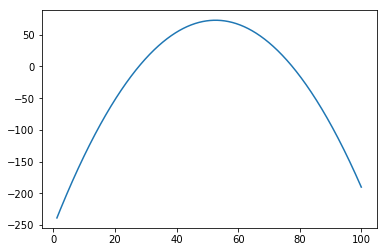

0.01818181818181818


In [53]:
from scipy.interpolate import UnivariateSpline
b = np.array([0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98])
T = np.array(1/b)

E = np.array([-279.558,-279.558,-279.558,-279.558,-279.558,-279.558,-507.244,-778.189,-1370.165,-2516.697,-2778.342,-2860.946,-2906.306,-2911.594,-2911.594,-2911.594,-2911.594,-2911.594])
E_err = np.array([0.696,0.743,0.923,1.737,13.925,6.132,1.018,0.587,0.316,0.197,0.13])

spl = UnivariateSpline(T,E)
d_spl = spl.derivative()
xs = np.linspace(T[0],T[len(T)-1],1000)
y = d_spl(xs)
plt.plot(xs,-y)
plt.show()


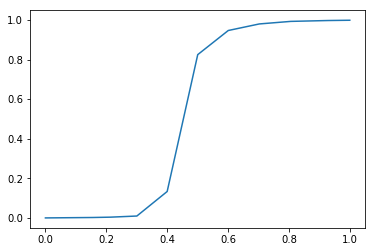

In [27]:
import scipy.interpolate as Interpolate
beta_test = np.linspace(0,1,len(M_2))
M_2_curve = Interpolate.interp1d(beta_test,M_2,kind='linear')
beta = np.linspace(0,1,10000)
plt.plot(beta, M_2_curve(beta))
plt.show()

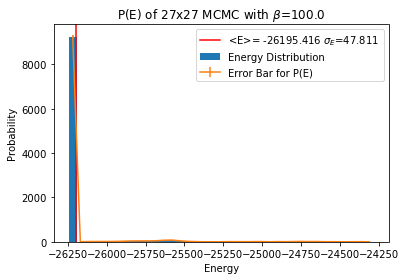

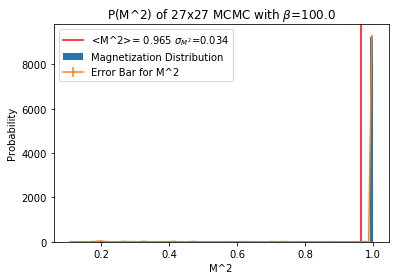

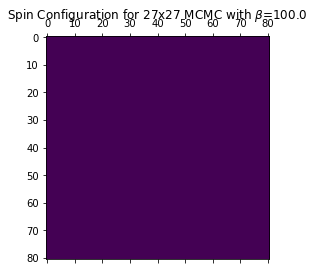

In [61]:
###Spin Configuration for Coarse-Graining 81x81 to 27x27 and 9x9

def plotSpin(size,beta):
    spin = []
    fileName = ("SPIN_CONFIG/{}/beta_J={}.txt").format(size,beta)
    file = open(fileName).readlines()
    for line in file:
        component = line.split()
        if component[0] == "S":
            spin.append(int(component[1]))
    spin = np.array(spin).reshape((size,size))
    plt.figure()
    title = ("{}x{} with"+r"$\beta$J"+"={}").format(size,size,beta)
    plt.matshow(spin)
    plt.title(title)
    plt.savefig("SPIN_CONFIG/img/"+title+".png")
    return plt.show()
beta_J = [0.0,0.3,0.4,0.5,0.6,100.0]
for i in beta_J:
    print("beta_J = {}".format(i))
    plotSpin(81,i)
    plotSpin(27,i)
    plotSpin(9,i)
    print('\n')

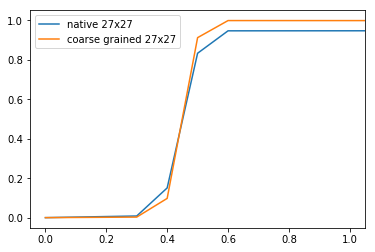

In [103]:

beta_J_list = [0.0,0.3,0.4,0.5,0.6,100.0]
url_native = "RENORMALIZED/native_field/beta_J="
url_cg = "RENORMALIZED/cg_field/beta_J="
def Mag_Exp(beta_J,url):
    mag_exp = []
    for beta_J in beta_J_list:
        mag = []
        fileName = url+"{}.txt".format(beta_J)
        file = open(fileName).readlines()
        for line in file:
            component = line.split()
            if component[0] == "M":
                mag.append(float(component[1]))
        mag = np.array(mag)
        (mean_M, variance_M, error_M, autocorrelation_M) = stats.Stats(mag)
        mag_exp.append(mean_M)
    return mag_exp

mag_exp_native = Mag_Exp(beta_J,url_native)
mag_exp_cg = Mag_Exp(beta_J,url_cg)
#beta_J_list[-1] = 1
plt.figure()
plt.plot(beta_J_list,mag_exp_native,label='native 27x27')
plt.plot(beta_J_list,mag_exp_cg,label='coarse grained 27x27')
plt.axis([-0.05,1.05,-0.05,1.05])
plt.legend(loc='upper left')
plt.show()

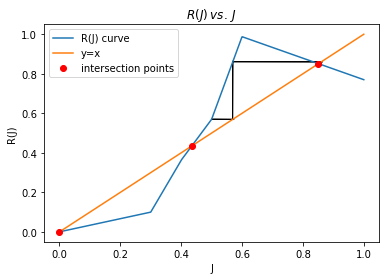

In [169]:
def y(x):
    return x
beta_J_list[-1] = 1
mag_exp_native_curve = Interpolate.interp1d(mag_exp_native,beta_J_list,kind='linear')
mag_exp_data = np.linspace(mag_exp_cg[0],mag_exp_cg[-1],1000)
beta = np.linspace(0,1,1000)
#plt.plot(beta_J_list,mag_exp_native_curve(mag_exp_cg),label=r"$\beta\> vs \> <M^2>$ native")
#print(mag_exp_native_curve(mag_exp_cg))
#plt.plot(beta_J_list,mag_exp_cg,label='coarse grained 27x27')
R_J_curve = Interpolate.interp1d(beta_J_list,mag_exp_native_curve(mag_exp_cg),kind = 'linear')
plt.plot(beta,R_J_curve(beta),label = 'R(J) curve')
plt.plot(beta,y(beta),label='y=x')
idx = np.argwhere(np.diff(np.sign(R_J_curve(beta) - y(beta)))).flatten()
plt.plot(beta[idx], R_J_curve(beta)[idx], 'ro',label='intersection points')
plt.arrow(0.5, R_J_curve(0.5), R_J_curve(0.5)-0.5,0)
plt.arrow(R_J_curve(0.5),R_J_curve(0.5),0,R_J_curve(R_J_curve(0.5))-R_J_curve(0.5))
plt.arrow(R_J_curve(0.5),R_J_curve(R_J_curve(0.5)),R_J_curve(R_J_curve(0.5))-R_J_curve(0.5),0)
plt.arrow(R_J_curve(R_J_curve(0.5)),R_J_curve(R_J_curve(0.5)),0,R_J_curve(R_J_curve(R_J_curve(0.5)))-R_J_curve(R_J_curve(0.5)))
plt.title(r'$R(J)\> vs.\> J$')
plt.xlabel('J')
plt.ylabel('R(J)')
plt.legend(loc = 'upper left')
plt.show()

In [177]:
import math
slope = (R_J_curve(0.7) - R_J_curve(1.0))/(0.7-1.0)
print(slope)
m = math.log(abs(slope),3)
v = 1/m

-0.543679508394
